In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.parse
import requests

%matplotlib inline

base_url = "https://uk.wikipedia.org/wiki/"
# Тут вводимо кирилецею, для того щоб закодуваты бо йому не подобаэться урл
article_name = "Населення_України"

# Кодуємо URL
encoded_url = base_url + urllib.parse.quote(article_name)

# Створюємо заголовок, щоб прикинутися браузером Chrome
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
}

# Робимо запит за допомогою requests
response = requests.get(encoded_url, headers=headers)

# Перевіряємо, чи успішний запит (код 200)
if response.status_code == 200:
    tables = pd.read_html(response.text, match="Коефіцієнт народжуваності в регіонах України", thousands=".", decimal=",")
    df = tables[0]
    print("Дані успішно завантажено!\n")
else:
    print(f"Помилка при завантаженні: {response.status_code}")
    exit()


Дані успішно завантажено!



C:\Users\User\AppData\Local\Temp\ipykernel_17016\1177992936.py:26: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(response.text, match="Коефіцієнт народжуваності в регіонах України", thousands=".", decimal=",")


In [19]:
# Вивести перші рядки таблиці (head)
print("--- Перші 5 рядків ---")
print(df.head())

--- Перші 5 рядків ---
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


In [20]:
# Визначте кількість рядків та стовпців (shape)
rows, cols = df.shape
print(f"Кількість рядків: {rows}, Кількість стовпців: {cols}")

Кількість рядків: 28, Кількість стовпців: 9


In [21]:
# Замініть у таблиці значення "—" на значення NaN
print("--- Перед заміною '—' на NaN ---")
print(df.head())
print("\n")
df = df.replace("—", np.nan)
print("--- Після заміни ---")
print(df.head())

--- Перед заміною '—' на NaN ---
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6     —     —
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2     —


--- Після заміни ---
             Регіон  1950  1960  1970  1990  2000  2012  2014  2019
0              Крим  23.0  20.6  16.0  13.0   7.3  12.6   NaN   NaN
1         Вінницька  22.4  19.2  14.2  12.4   8.4  11.2  10.9   7.6
2         Волинська  24.7  25.0  17.9  15.3  11.2  14.8  14.1  10.1
3  Дніпропетровська  20.4  20.4  15.1  12.3   7.1  11.2  11.1   7.1
4          Донецька  27.1  21.4  14.0  10.9   6.1   9.8   8.2   NaN


In [22]:
# Визначте типи всіх стовпців (dtypes)
print("--- Типи стовпців до перетворення ---")
print(df.dtypes)

--- Типи стовпців до перетворення ---
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014       object
2019       object
dtype: object


In [23]:
# Замініть типи нечислових колонок на числові
for col in df.columns:
    if col != "Регіон":
        df[col] = pd.to_numeric(df[col], errors='coerce')

print("--- Типи стовпців після перетворення ---")
print(df.dtypes)

--- Типи стовпців після перетворення ---
Регіон     object
1950      float64
1960      float64
1970      float64
1990      float64
2000      float64
2012      float64
2014      float64
2019      float64
dtype: object


In [24]:
# Порахуйте, яка частка пропусків міститься в кожній колонці
print("--- Частка пропусків у кожній колонці ---")
missing_ratio = df.isnull().sum() / len(df)
print(missing_ratio)

--- Частка пропусків у кожній колонці ---
Регіон    0.000000
1950      0.071429
1960      0.035714
1970      0.035714
1990      0.000000
2000      0.000000
2012      0.000000
2014      0.071429
2019      0.142857
dtype: float64


In [25]:
# Видаліть з таблиці дані по всій країні, останній рядок таблиці
if not df.empty and df.iloc[-1]['Регіон'] == 'Україна':
    print(f"Видалення останього рядка таблиці - {df.index[-1]}")
    df = df.drop(df.index[-1])

Видалення останього рядка таблиці - 27


In [26]:
# Замініть відсутні дані в стовпцях середніми значеннями цих стовпців
numeric_cols = df.select_dtypes(include=[np.number]).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("--- Перевірка на відсутність пропусків після fillna ---")
print(df.isnull().sum())


--- Перевірка на відсутність пропусків після fillna ---
Регіон    0
1950      0
1960      0
1970      0
1990      0
2000      0
2012      0
2014      0
2019      0
dtype: int64


In [27]:
# Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
average_2019 = df['2019'].mean()
regions_above_avg = df[df['2019'] > average_2019]['Регіон']

print(f"Середнє значення у 2019 році: {average_2019:.2f}")
print("--- Регіони з народжуваністю вище середньої у 2019 ---")
print(regions_above_avg.tolist())

Середнє значення у 2019 році: 8.02
--- Регіони з народжуваністю вище середньої у 2019 ---
['Волинська', 'Закарпатська', 'Івано-Франківська', 'Львівська', 'Одеська', 'Рівненська', 'Херсонська', 'Чернівецька', 'Київ']


In [28]:
# У якому регіоні була найвища народжуваність у 2014 році?
max_idx_2014 = df['2014'].idxmax()
region_max_2014 = df.loc[max_idx_2014, 'Регіон']
val_max_2014 = df.loc[max_idx_2014, '2014']

print(f"Найвища народжуваність у 2014 році була в регіоні: {region_max_2014} ({val_max_2014})")

Найвища народжуваність у 2014 році була в регіоні: Рівненська (14.8)


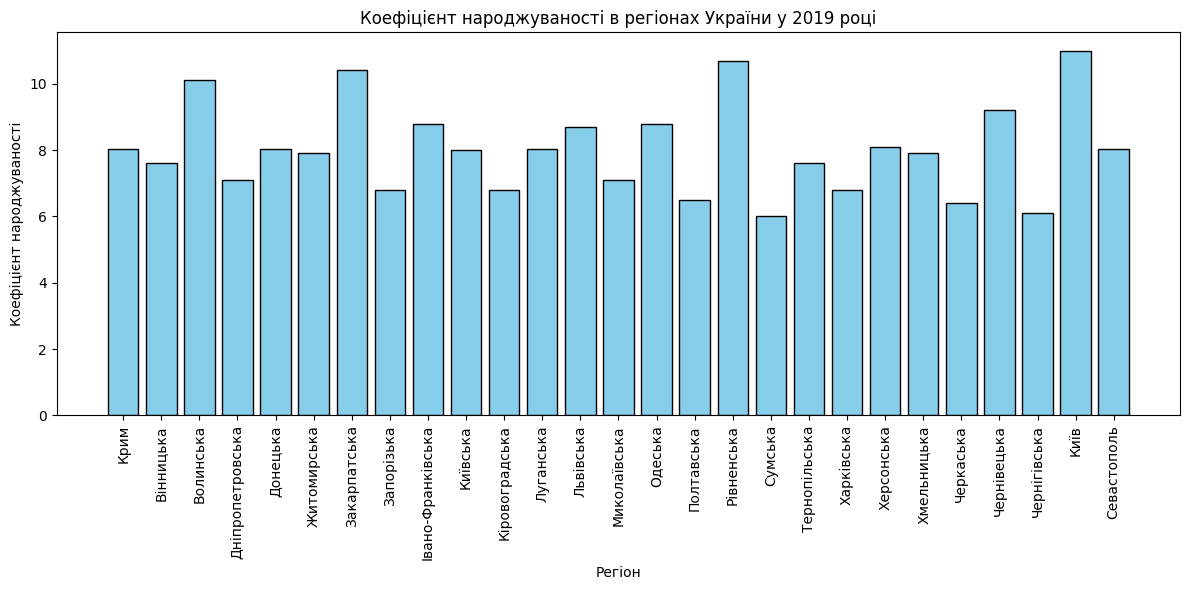

In [29]:
# Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
plt.figure(figsize=(12, 6))
plt.bar(df['Регіон'], df['2019'], color='skyblue', edgecolor='black')
plt.xlabel('Регіон')
plt.ylabel('Коефіцієнт народжуваності')
plt.title('Коефіцієнт народжуваності в регіонах України у 2019 році')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

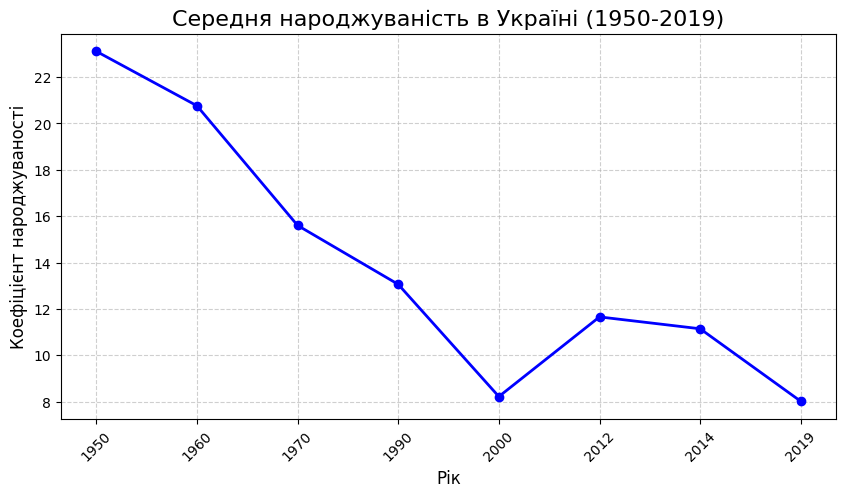

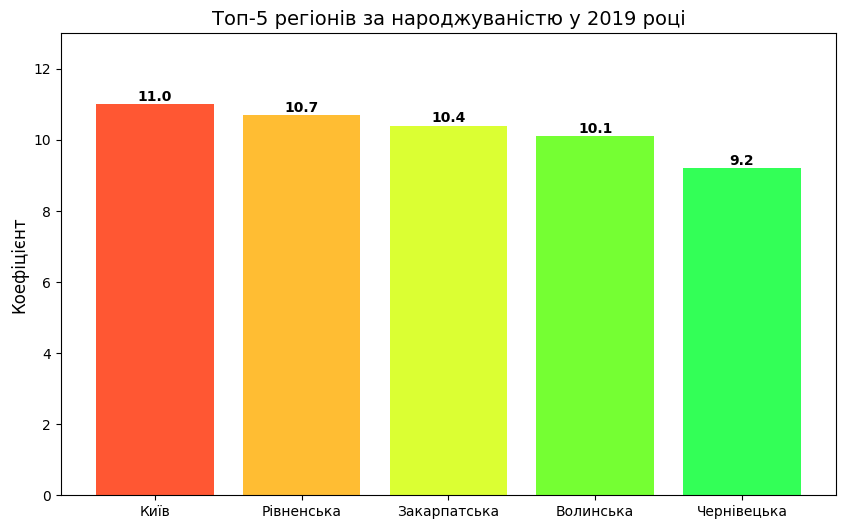

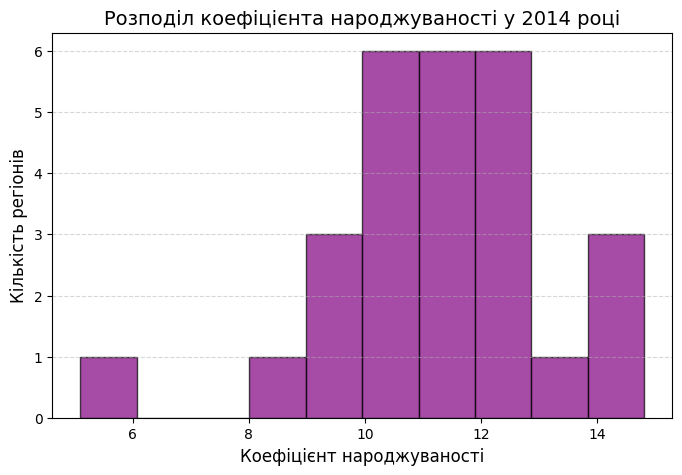

In [30]:
years = df.columns[1:]

for col in years:
    df[col] = df[col].replace("—", np.nan)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df[years] = df[years].fillna(df[years].mean())

# Графік 1: Лінійний графік динаміки народжуваності в Україні (середнє значення)
plt.figure(figsize=(10, 5))
years = df.columns[1:] 
means = df[years].mean()

plt.plot(means.index, means.values, marker='o', linestyle='-', color='b', linewidth=2)
plt.title('Середня народжуваність в Україні (1950-2019)', fontsize=16)
plt.xlabel('Рік', fontsize=12)
plt.ylabel('Коефіцієнт народжуваності', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
plt.show()


# Графік 2: Стовпчикова діаграма топ-5 регіонів з найвищою народжуваністю у 2019 році
plt.figure(figsize=(10, 6))
top_5_2019 = df.sort_values(by='2019', ascending=False).head(5)

plt.bar(top_5_2019['Регіон'], top_5_2019['2019'], color=['#FF5733', '#FFBD33', '#DBFF33', '#75FF33', '#33FF57'])
plt.title('Топ-5 регіонів за народжуваністю у 2019 році', fontsize=14)
plt.ylabel('Коефіцієнт', fontsize=12)
plt.ylim(0, top_5_2019['2019'].max() + 2)
for i, v in enumerate(top_5_2019['2019']):
    plt.text(i, v + 0.1, str(round(v, 1)), ha='center', fontweight='bold')
plt.show()


# Графік 3: Розподіл народжуваності у 2014 році
plt.figure(figsize=(8, 5))

plt.hist(df['2014'], bins=10, color='purple', edgecolor='black', alpha=0.7)

plt.title('Розподіл коефіцієнта народжуваності у 2014 році', fontsize=14)
plt.xlabel('Коефіцієнт народжуваності', fontsize=12)
plt.ylabel('Кількість регіонів', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()